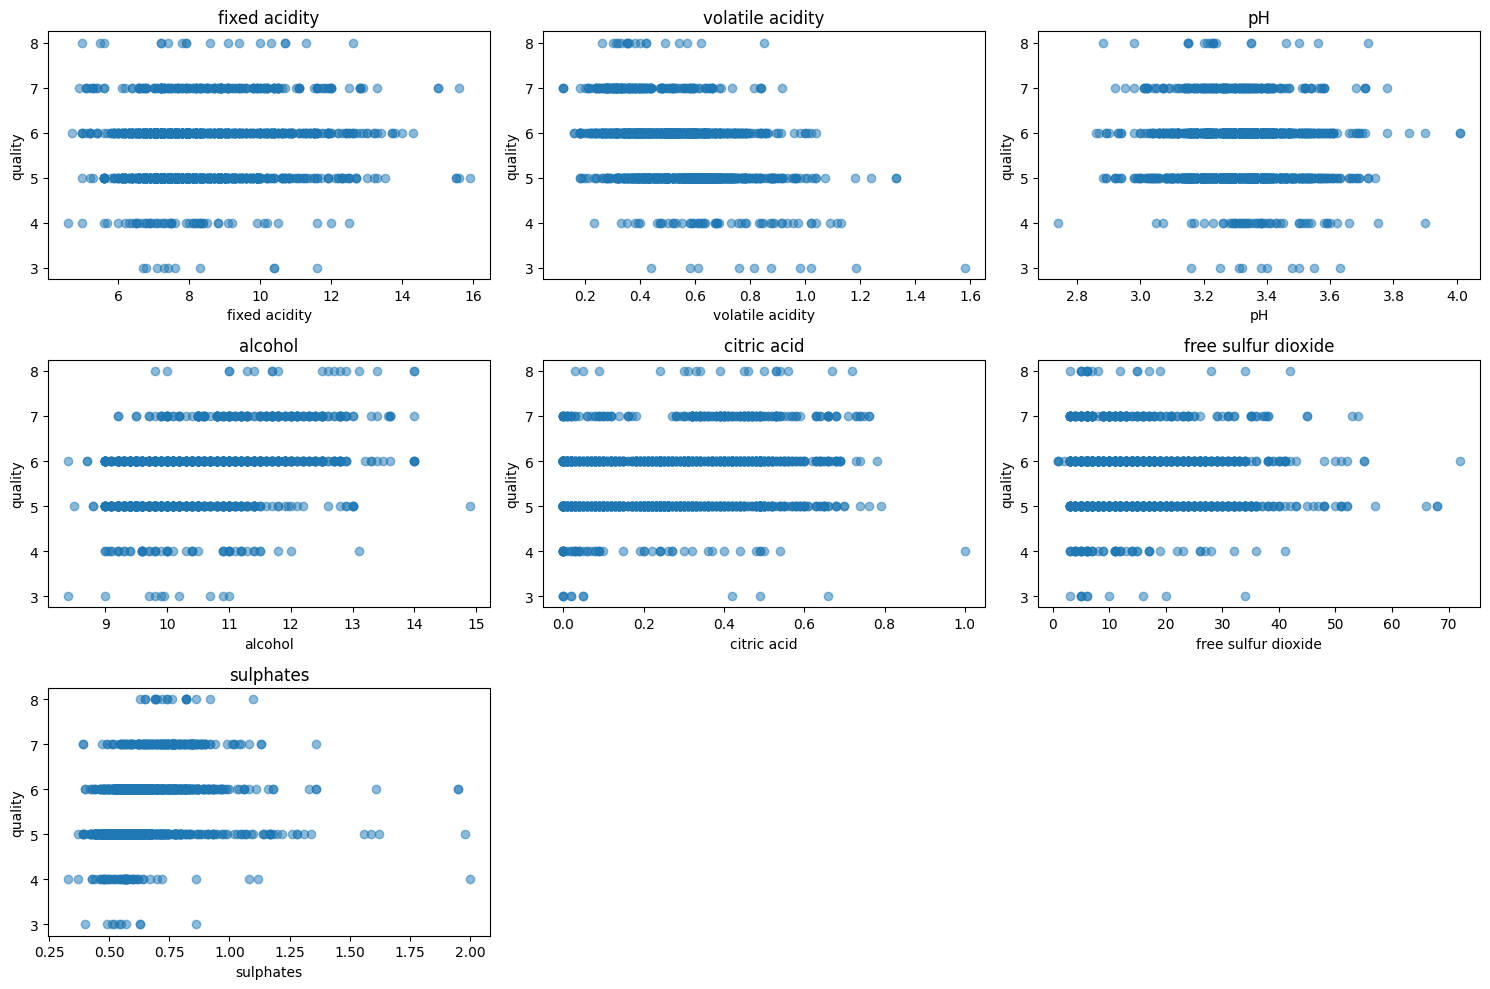

In [25]:
# @title дополнительная задача



#Scatter plot
import pandas as pd
import matplotlib.pyplot as plt

# Загрузить набор винных данных
wine_data = pd.read_csv("/content/winequality-red.csv")

# входные переменные
input_variables = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol', 'citric acid', 'free sulfur dioxide', 'sulphates']

#выходная переменная
output_variable = 'quality'

# Нарисуйте диаграмму рассеяния
plt.figure(figsize=(15, 10))
for i, variable in enumerate(input_variables, 1):
    plt.subplot(3, 3, i)
    plt.scatter(wine_data[variable], wine_data[output_variable], alpha=0.5)
    plt.title(variable)
    plt.xlabel(variable)
    plt.ylabel(output_variable)
plt.tight_layout()
plt.show()


In [24]:
# @title Задача №19
#Класс для нормализации среднего значения MeanNormalisation
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [19]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform( data)
data_cs21_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,5.332403e-17,2.166289e-17,-1.777468e-17,-1.110917e-17,1.666376e-17,-7.776421e-18,5.554587e-18,-4.803607e-15,3.466062e-16,6.887688e-17,8.887339e-18,7.776421e-18
std,1.540793e-01,1.226436e-01,1.948011e-01,9.657042e-02,7.857313e-02,1.473262e-01,1.162379e-01,1.385708e-01,1.215641e-01,1.015012e-01,1.639489e-01,1.615139e-01
min,-3.291714e-01,-2.793291e-01,-2.709756e-01,-1.122470e-01,-1.259875e-01,-2.095059e-01,-1.429957e-01,-4.902114e-01,-4.496954e-01,-1.964963e-01,-3.112282e-01,-5.272045e-01
25%,-1.079325e-01,-9.439761e-02,-1.809756e-01,-4.375380e-02,-2.915950e-02,-1.249989e-01,-8.645863e-02,-8.419084e-02,-7.961669e-02,-6.475979e-02,-1.419974e-01,-1.272045e-01
50%,-3.713604e-02,-5.356516e-03,-1.097561e-02,-2.320586e-02,-1.413446e-02,-2.640735e-02,-2.992153e-02,2.438198e-04,-8.765321e-04,-2.284362e-02,-3.430509e-02,7.279550e-02
75%,7.790821e-02,7.683527e-02,1.490244e-01,4.191404e-03,4.229480e-03,7.218420e-02,5.488413e-02,7.990608e-02,6.998961e-02,4.302464e-02,1.041564e-01,7.279550e-02
max,6.708286e-01,7.206709e-01,7.290244e-01,8.877530e-01,8.740125e-01,7.904941e-01,8.570043e-01,5.097886e-01,5.503046e-01,8.035037e-01,6.887718e-01,4.727955e-01


In [16]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

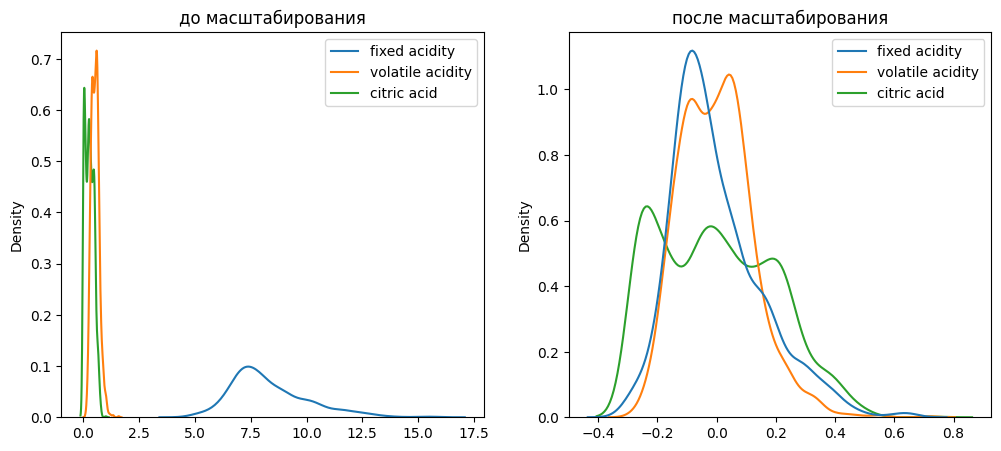

In [23]:
draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')


In [26]:
# @title Задача №39

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif


wine_data = pd.read_csv("/content/winequality-red.csv")

print(wine_data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

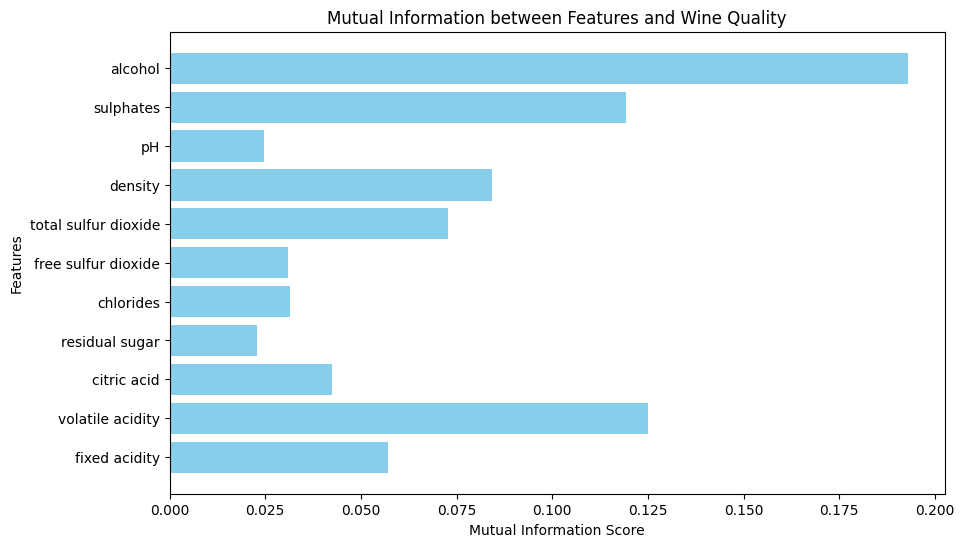

In [7]:
# Функции и метки сегментов
X = wine_data.drop('quality', axis=1)  # Функции ввода
y = wine_data['quality']  # выходная переменная

# Взаимная информация
mutual_info_scores = mutual_info_classif(X, y)

# Визуализация оценок взаимной информации
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mutual_info_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information between Features and Wine Quality')
plt.show()

In [8]:
# Выберите объекты с помощью SelectPercentile
selector = SelectPercentile(mutual_info_classif, percentile=10)
X_selected = selector.fit_transform(X, y)

# Получите индекс столбца и имя выбранного объекта.
selected_features_indices = selector.get_support(indices=True)
selected_features_names = X.columns[selected_features_indices]

# Распечатать выбранные объекты
print("Selected features:")
print(X[selected_features_names].head())

Selected features:
   alcohol
0      9.4
1      9.8
2      9.8
3      9.8
4      9.4
